In [1]:
using UniversalDiffEq, Plots

[ Info: Precompiling UniversalDiffEq [6fefd740-e8e9-483c-b5b4-ec812cd4a1ea]
┌ Warning: Package LinearSolve does not have Enzyme in its dependencies:
│ - If you have LinearSolve checked out for development and have
│   added Enzyme as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with LinearSolve
└ Loading Enzyme into LinearSolve from project dependency, future warnings for LinearSolve are suppressed.


In [4]:
include("OpenAccessFishery.jl")

Main.OpenAccessFishery

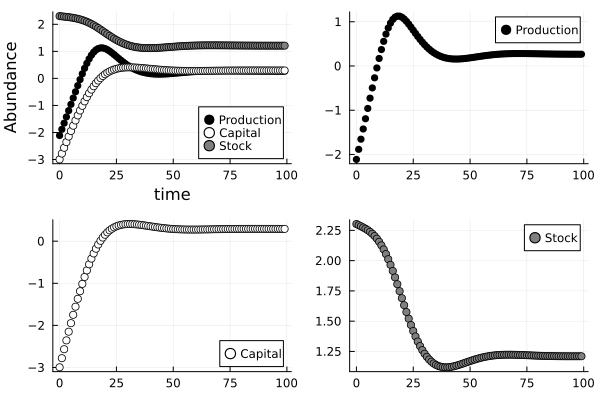

In [3]:

data = OpenAccessFishery.simulate_data(OpenAccessFishery.stable_eq,nsteps = 100,tspan = [0.0,100],sigma = [0.0,0.0,0.0])
p1,p2,p3,p4 = OpenAccessFishery.plot_simulation(data)
plot(p1,p2,p3,p4)

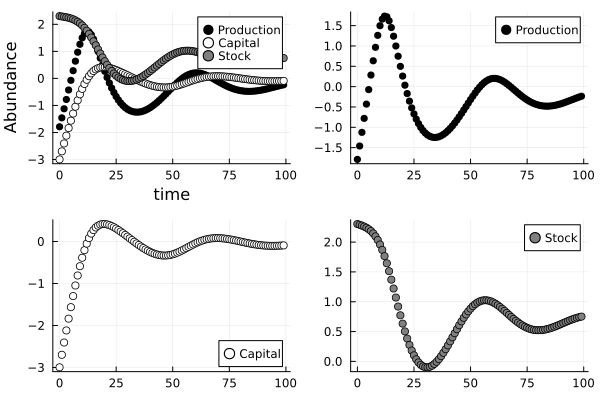

In [4]:
data = OpenAccessFishery.simulate_data(OpenAccessFishery.damped_osc,nsteps = 100,tspan = [0.0,100],sigma = [0.0,0.0,0.0])
p1,p2,p3,p4 = OpenAccessFishery.plot_simulation(data)
plot(p1,p2,p3,p4)

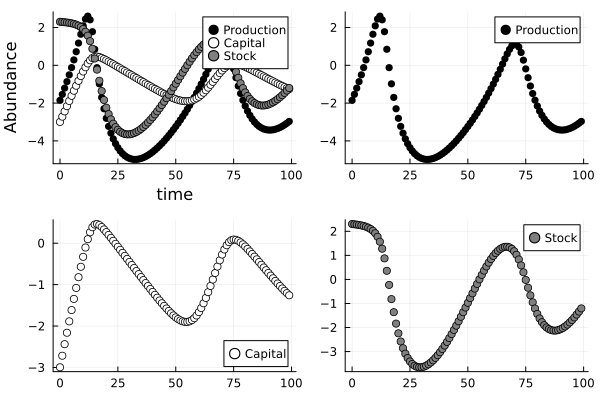

In [5]:
data = OpenAccessFishery.simulate_data(OpenAccessFishery.limit_cyc,nsteps = 100,tspan = [0.0,100],sigma = [0.0,0.0,0.0])
p1,p2,p3,p4 = OpenAccessFishery.plot_simulation(data)
plot(p1,p2,p3,p4)

In [9]:
data = OpenAccessFishery.simulate_data(OpenAccessFishery.limit_cyc,nsteps = 80,tspan = [0.0,80],
                                sigma = [0.0,0.0,0.0],variables = ["Capital","Stock"])
model1 = SSNODE(data)
nothing

In [10]:
gradient_decent!(model1,verbos = true, maxiter = 250)

5.805 5.539 5.301 5.035 4.806 4.576 4.35 4.138 3.94 3.743 3.554 3.375 3.205 3.044 2.886 2.734 2.591 2.458 2.328 2.203 2.085 1.974 1.869 1.766 1.669 1.579 1.493 1.411 1.332 1.259 1.19 1.123 1.06 1.001 0.945 0.892 0.841 0.794 0.749 0.706 0.666 0.628 0.592 0.557 0.525 0.495 0.466 0.439 0.413 0.388 0.365 0.344 0.323 0.304 0.287 0.269 0.251 0.237 0.221 0.207 0.195 0.182 0.171 0.16 0.149 0.14 0.13 0.122 0.114 0.107 0.1 0.093 0.087 0.081 0.075 0.07 0.065 0.061 0.057 0.053 0.049 0.045 0.042 0.039 0.036 0.034 0.031 0.029 0.027 0.025 0.023 0.021 0.019 0.018 0.017 0.015 0.014 0.013 0.012 0.011 0.01 0.009 0.009 0.008 0.007 0.007 0.006 0.006 0.005 0.005 0.004 0.004 0.004 0.003 0.003 0.003 0.003 0.002 0.002 0.002 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.0 0.0 0.0 0.0 0.0 0.0 0.001 0.001 0.002 0.003 0.004 0.002 0.0 0.002 0.002 0.0 0.001 0.001 0.0 0.001 0.001 0.001 0.001 0.0 0.001 0.001 0.001 0.001 0.0 0.001 0.0 0.001 0.0

In [ ]:
MSE, training_data, testing_data, standard_error, predicted_data = leave_future_out_cv(model1;forecast_length = 20,  
                                            forecast_number = 5, spacing = 10, step_size = 0.05, maxiter = 250)

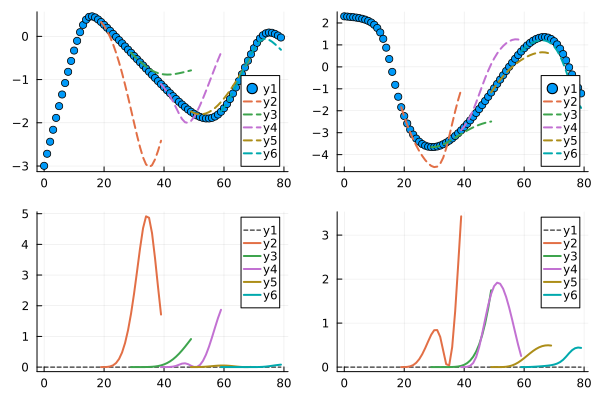

In [34]:
p1=Plots.scatter(data.t,data.Capital)
p2=Plots.scatter(data.t,data.Stock)
p3 = Plots.plot([0,data.t[end]],[0.0,0.0], color = "black", linestyle = :dash)
p4 = Plots.plot([0,data.t[end]],[0.0,0.0], color = "black", linestyle = :dash)
for i in 1:length(testing_data)
    Plots.plot!(p1,predicted_data[i].t,predicted_data[i].Capital, linestyle = :dash, width= 2, title = "Capital") 
    Plots.plot!(p2,predicted_data[i].t,predicted_data[i].Stock, linestyle = :dash, width= 2, title = "Stock") 
    Plots.plot!(p3,standard_error[i].t,standard_error[i].Capital, width= 2)
    Plots.plot!(p4,standard_error[i].t,standard_error[i].Stock, width= 2)
end 
plot(p1,p2,p3, p4)

In [16]:
OpenAccessFishery.limit_cyc.k

1.1

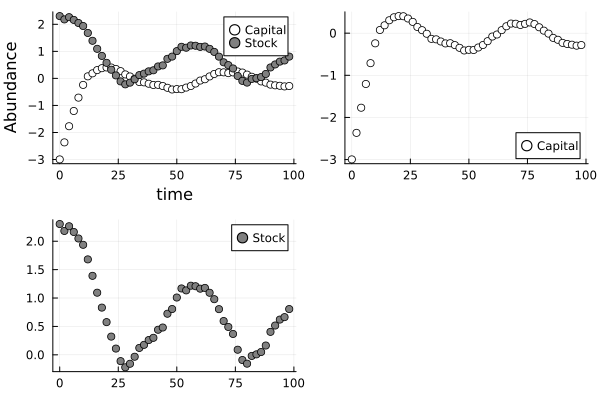

In [5]:
# parameters
k = OpenAccessFishery.damped_osc.k
handeling_time = OpenAccessFishery.damped_osc.handeling_time
search_efficancy = OpenAccessFishery.damped_osc.search_efficancy_0
threshold_CPUE = OpenAccessFishery.damped_osc.threshold_CPUE
entry = OpenAccessFishery.damped_osc.entry

function interaction_term(u)
    X = exp(u[1]); K = exp(u[2])
    CPUE = search_efficancy*X^k/(1 + handeling_time*search_efficancy*X^k)
    dX = -CPUE * K
    dK = entry*(CPUE-threshold_CPUE)*K
    return [1/X,1/K].*[dX,dK]
end 


pars = (u0 = [10.0,0.05,0.0],growth_rate = 0.3,carrying_capacity = 10.0,search_efficancy_0 = 0.25,
            tech_imporvement = 0.0,handeling_time = 0.0,k= 1.0,depreciation = 0.0,entry = 0.15,exit = 0.15,
            threshold_CPUE = 0.5, sigma_X = 0.05,sigma_K = 0.025)


data = OpenAccessFishery.simulate_data(pars,nsteps = 50,tspan = [0.0,100],
                                sigma = [0.0,0.0,0.0],variables = ["Capital","Stock"])

model = ContinuousModelErrors(data,interaction_term, proc_weight=2.0,obs_weight=0.5, reg_weight = 10^-8)
p1,p2,p3,p4=OpenAccessFishery.plot_simulation(data)
plot(p1,p3,p4)

In [ ]:
gradient_decent!(model,verbos = true, maxiter = 500, step_size = 0.05)

In [ ]:
plot_state_estiamtes(model)

In [ ]:
plot_predictions(model)

In [ ]:
plot_forecast(model,20)

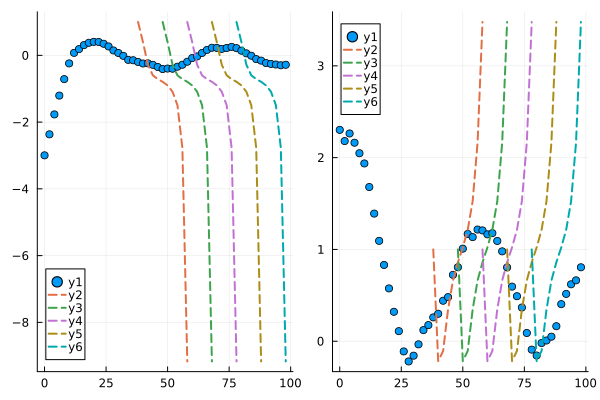

In [12]:
model = ContinuousModelErrors(data,interaction_term, proc_weight=2.0,obs_weight=0.5, reg_weight = 0.0)
MSE, training_data, testing_data, standard_error, predicted_data = leave_future_out_cv(model;forecast_length = 10,  
                                            forecast_number = 2, spacing = 10, step_size = 0.05, maxiter = 500)

UniversalDiffEq.plot_leave_future_out_cv(model.data_frame,testing_data, standard_error , predicted_data)
p1

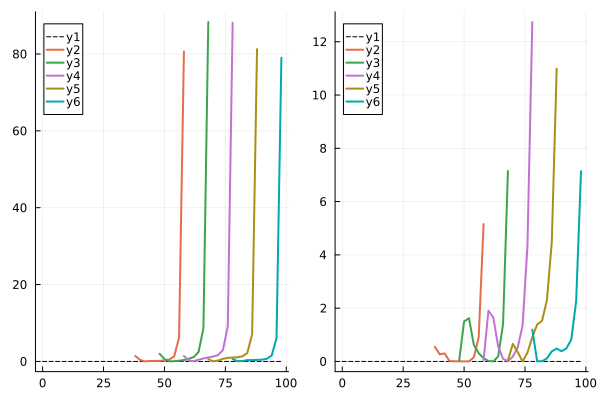

In [13]:
p2

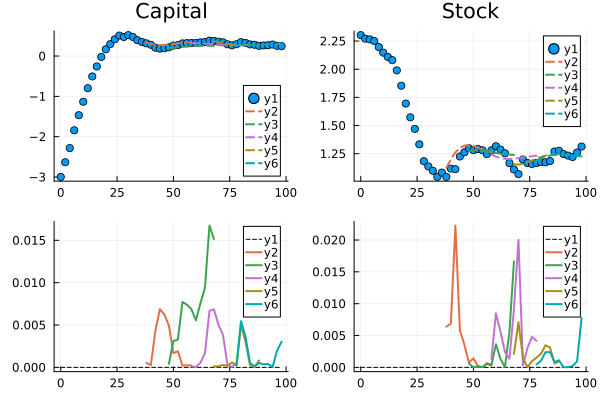

In [204]:
model1 = SSNODE(data,proc_weight=2.0,obs_weight=0.5, reg_weight = 0.0)
MSE, training_data, testing_data, standard_error, predicted_data = leave_future_out_cv(model1;forecast_length = 10,  
                                            forecast_number = 5, spacing = 5, step_size = 0.05, maxiter = 500)

UniversalDiffEq.plot_leave_future_out_cv(model1.data_frame,testing_data, standard_error , predicted_data)

plot(p1,p2,layout = (2,1))

In [18]:
data = OpenAccessFishery.simulate_data(pars,nsteps = 50,tspan = [0.0,100],sigma = [0.0,0.0,0.0],variables = ["Capital","Stock"])

function simulation_test(data_generator, model_generator,forecast_length,forecast_number,spacing,maxiter,stepsize)
    data = data_generator()
    model
    MSE, training_data, testing_data, squared_errors, predicted_data = leave_future_out_cv(model1;forecast_length = forecast_length,  
                                forecast_number = forecast_number, spacing = spacing, step_size = stepsize, maxiter = maxiter)
    data_quantity = [length(training_data[i].t) for i in 1:length(training_data)]
    return squared_errors, data_quantity
end 

function simulation_tests(Nsims,data_generator,model_generator,forecast_length,forecast_number,spacing,maxiter,stepsize)
    SEs = zeros(forecast_number)
    data_quantity = zeros(forecast_number)
    for i in 1:Nsims
        print(i)
        SE, data_quantity = simulation_test(data_generator,model_generator,forecast_length,forecast_number,spacing,maxiter,stepsize)
        for j in 1:forecast_number
            SEs[j] += sum(Matrix(SE[j][:,2:end]))/prod(size(SE[j][:,2:end]))
        end 
    end 
    return SEs, data_quantity
end 


simulation_tests (generic function with 1 method)

In [19]:
data_generator = () -> OpenAccessFishery.simulate_data(pars,nsteps = 50,tspan = [0.0,100],sigma=[0.0,0.0,0.0],variables=["Capital","Stock"])

model_generator = data -> SSNODE(data,proc_weight=2.0,obs_weight=0.5, reg_weight = 0.0)

SEs,data_quantity = simulation_tests(10,data_generator,model_generator,10,5,7,500,0.05)

12345678910

([0.775791929065132, 0.3946444492896783, 0.05871297153196603, 0.12155103986882379, 0.5268802029179821], [42, 49, 56, 63, 70])

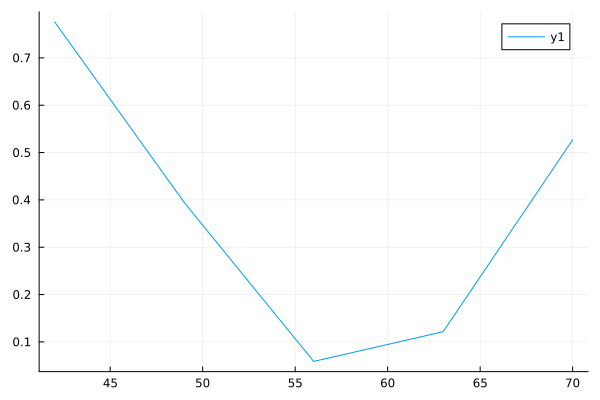

In [20]:
Plots.plot(data_quantity,SEs)

In [21]:
size(data)

(50, 3)